In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(40)

### Part 1

In [2]:
N=10
mu=1
sigma=0.2
samples= norm(mu, sigma).rvs(N) #gaussian distribution with random numbers
print(samples)

[0.87849046 0.97477272 0.86307873 1.18574295 0.63111979 0.90659952
 1.45849807 1.09776201 1.1420534  1.21110689]


Text(0, 0.5, 'probability')

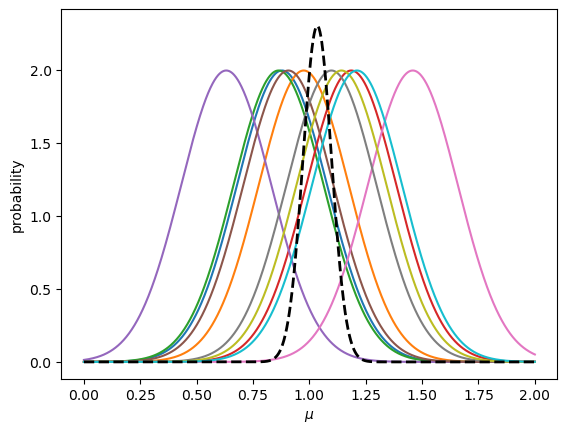

In [9]:
x_grid = np.linspace(0, 2, 1000) #it fills better the plot
single_L = np.array([norm.pdf(x_grid, loc=sample, scale=sigma) for sample in samples])

plt.figure(dpi = 100)
[plt.plot(x_grid, l) for l in single_L]
    
prod_L = np.prod(single_L, axis=0)

plt.plot(x_grid, prod_L, ls='--', c='black',linewidth=2)
plt.xlabel('$\mu$')
plt.ylabel('probability')

In [10]:
sorted_indexes = np.argsort(prod_L)
max_index = sorted_indexes[-1]
print("Max likelihood solution ", x_grid[max_index])
print("Estimator ", np.mean(samples))

Max likelihood solution  1.035035035035035
Estimator  1.0349224530275145


### Part 2

In [12]:
#Fisher matrix error estimate
sigma_mu = np.diff(np.log(prod_L), n=2) #second derivative of log L
sigma_mu = sigma_mu/(x_grid[1] - x_grid[0])**2
sigma_mu = (sigma_mu*(-1))**(-1/2)
print("Fisher matrix error ", sigma_mu[max_index])
sigma_distribution = sigma/(N**(1/2))
print("sigma/sqrt(N) ", sigma_distribution)

Fisher matrix error  0.06324555320339255
sigma/sqrt(N)  0.06324555320336758


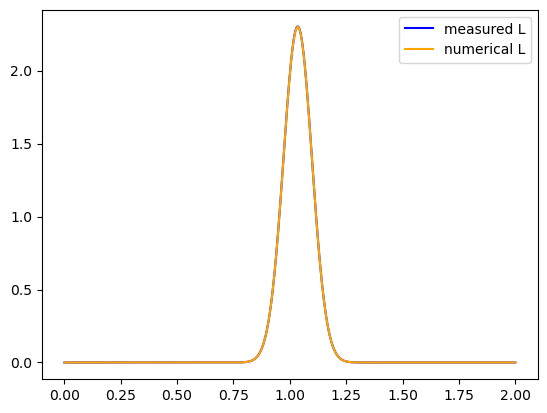

In [13]:
#measured gaussian
pdf = norm.pdf(x_grid, np.mean(samples), sigma_distribution)
plt.figure(dpi = 100)
k=0.365 #it is adjusted in a way that the measured and numerical gaussians coincide
plt.plot(x_grid, k*pdf, c='blue', label='measured L')
#numerical likelihood
plt.plot(x_grid, prod_L, c='orange', label='numerical L')
plt.legend()
plt.show()

### Part 3 - heteroscedastic errors- 10 measurments in 10 nights

In [25]:
np.random.seed(42)
N=10
mu=1
sigma = norm(0.2, 0.05).rvs(N)
samples= np.concatenate([norm(mu, sig).rvs(1) for sig in sigma]) #gaussian distribution with random numbers
print(samples)

#Plot each of the individual likelihoods separately
x_grid = np.linspace(0, 2.2, 1000)

[0.89580716 0.91007374 1.05622826 0.4716448  0.6752112  0.89412511
 0.71745998 1.07490768 0.83970989 0.67922628]


Text(0, 0.5, 'probability')

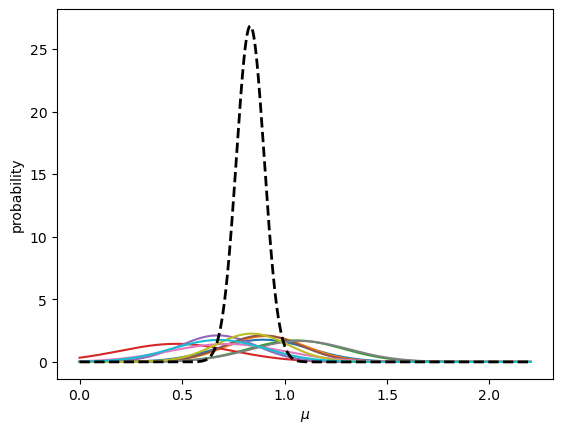

In [26]:
single_L = np.array([norm.pdf(x_grid,loc=s,scale=ss) for s,ss in zip(samples,sigma)])

plt.figure(dpi = 100)
#If we want to know the total probability of our entire data set -> product of L
[plt.plot(x_grid, l) for l in single_L]
prod_L = np.prod(single_L, axis=0)

plt.plot(x_grid, prod_L, ls='--', c='black',linewidth=2)
plt.xlabel('$\mu$')
plt.ylabel('probability')

In [35]:
sorted_indexes = np.argsort(prod_L)
max_index = sorted_indexes[-1]
print("Max likelihood solution ", x_grid[max_index])
average_L = np.average(samples, weights=1/(sigma**2))
print("Estimator ", average_L) #weighted average

Max likelihood solution  0.8324324324324325
Estimator  0.8329332832457355


In [36]:
#Fisher matrix error estimate
sigma_mu = np.diff(np.log(prod_L), n=2) #second derivative of log L
sigma_mu = sigma_mu/(x_grid[1] - x_grid[0])**2
sigma_mu = (sigma_mu*(-1))**(-1/2)
print("Fisher matrix error ", sigma_mu[max_index]) 

sigma_distribution = (np.sum(1/sigma**2))**(-1/2)
print("sigma distribution ", sigma_distribution)

Fisher matrix error  0.0679516599605048
sigma distribution  0.06795165996052004


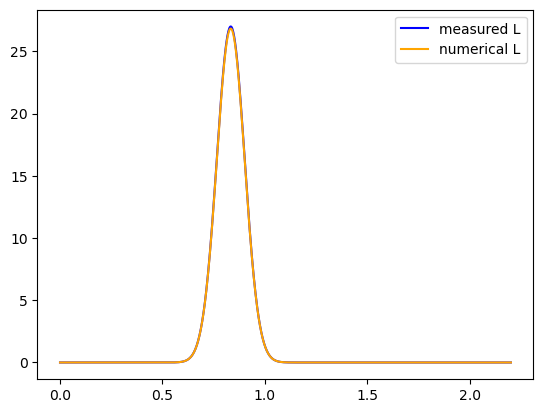

In [43]:
pdf = norm.pdf(x_grid, average_L, sigma_distribution)
plt.figure(dpi = 100)
k=4.6
plt.plot(x_grid, k*pdf, c='blue', label='measured L')
plt.plot(x_grid, prod_L, c='orange', label='numerical L')
plt.legend()